DFS(Depth-first Search)  - 깊이우선탐색, 말그대로 그래프에서 가장 최상위 노드부터 하위노드까지 제일깊게 탐색하고, 다시 위로올라와서 깊게 깊게 탐색하는 방법입니다.

BFS(Breadth-first Search) - 너비우선탐색, 말 그대로 그래프에서 가장 최상위 노드부터 다음 차수(degree)를 모두 탐색하고, 그 다음차수를 모두 너비너비하게 탐색 하는 방법입니다.

# 유형 

1. 그래프의 모든 정점을 방문하는 것이 주요한 문제라면 DFS, BFS 두 가지 방법 중 어느 것을 사용해도 상관없음.

2. 경로의 특징을 저장해둬야 하는 문제. 예를 들어 각 정점에 숫자가 적혀있고 a부터 b 까지 가는 경로를 구하는데 경로에 같은 숫자가 있으면 안된다는 문제 등, 각각의 경로마다 특징을 저장해둬야 할 때는 DFS 를 사용. BFS는 경로의 특징을 가지지 못함.

3. 최단거리를 구해야 하는 문제. 미로 찾기 등 최단 거리를 구해야 할 경우, BFS 사용. 왜냐하면 깊이 우선 탐색으로 경로를 검색할 경우 처음으로 발견되는 해답이 최단거리가 아닐 수 있지만, 너비 우선 탐색으로 현재 노드에서 가까운 곳부터 찾기 때문에경로를 탐색 시 먼저 찾아지는 해답이 곧 최단거리기 때문입니다.

4. 검색 대상 그래프가 크다면 DFS 를 고려 

5. 검색 대상의 규모가 크지 않고, 검색 시작 지점으로부터 원하는 대상이 별로 멀지 않다면 BFS 

## BFS 

bfs 알고리즘의 핵심은 큐(queue) 자료구조를 사용하는 것. 노드를 방문하면서 인접한 노드 중 방문하지 않았던 노드의 정보만 큐에 넣어 먼저 큐에 들어있던 노드부터 방문하면 되는 것. 물론 큐를 사용하지 않아도 구현이 가능함.

큐를 list 타입을 사용해 자료를 입력할 때는 list.append(something), 출력할 때는 list.pop(0) 을 사용해서 구현하지만 시간복잡도상 비효율적인 코드가 만들어짐. 

따라서 collections 라이브러리의 ## deque 를 사용하면 좋음. 

In [2]:
graph_list = {1: set([3, 4]),
              2: set([3, 4, 5]),
              3: set([1, 5]),
              4: set([1]),
              5: set([2, 6]),
              6: set([3, 5])}
root_node = 1


from collections import deque

def BFS_with_adj_list(graph, root):
    visited = []
    queue = deque([root])

    while queue:
        n = queue.popleft()
        if n not in visited:
            visited.append(n)
            queue += graph[n] - set(visited)
    return visited
  
print(BFS_with_adj_list(graph_list, root_node))

[1, 3, 4, 5, 2, 6]


In [4]:
def bfs(graph, start_node):
    visit = list()
    queue = list()
    
    queue.append(start_node)
    
    while queue:
        node = queue.pop(0)
        if node not in visit:
            visit.append(node)
            queue.extend(graph[node])
            
    return visit
    

## DFS(Depth First Search, 깊이 우선 탐색)

DFS는 BFS와는 다르게 한 놈만 팬다(?)라는 느낌으로 한 방향으로 갈 수 있을 만큼 깊게 탐색한다는 의미에서 깊이 우선 탐색이라는 이름이 붙었습니다.

갈 수 있는 한 끝까지 탐색해 리프 노드를 방문하고, 이전 갈림길에서 선택하지 않았던 노드를 방문하는 식으로 탐색합니다.

In [3]:
def DFS_with_adj_list(graph, root):
    visited = []
    stack = [root]

    while stack:
        n = stack.pop()
        if n not in visited:
            visited.append(n)
            stack += graph[n] - set(visited)
    return visited

print(BFS_with_adj_list(graph_list, root_node))

[1, 3, 4, 5, 2, 6]


In [6]:
def DFS(graph, start_node):
    visit = list()
    stack = list()
    
    stack.append(start_node)
    
    while stack:
        node = stack.pop()
        if node not in visit:
            visit.append(node)
            stack.extend(graph[node])
            
    return visit

In [ ]:
n, m = map(int, input().split())
s = []
queue = []
dx = [1, -1, 0, 0]
dy = [0, 0, -1, 1]
for i in range(n):
    s.append(list(input()))
queue = [[0, 0]]
s[0][0] = 1
while queue:
    a, b = queue[0][0], queue[0][1]
    del queue[0]
    for i in range(4):
        x = a + dx[i]
        y = b + dy[i]
        if 0 <= x < n and 0 <= y < m and s[x][y] == "1":
            queue.append([x, y])
            s[x][y] = s[a][b] + 1
print(s[n - 1][m - 1])

### 인접 리스트 방식

파이썬으로 인접 리스트를 이용해 그래프를 표현할 때, 단순히 2차원 리스트를 이용하면 된다는 점을 기억하기.
* 
ex. N x M 리스트를 처리하는 방법

1) 인접 리스트: 딕셔너리를 이용해 출발 노드를 키로, 도착 노드를 값으로 저장하는 방식

실제 연결된 노드에 대한 정보만 저장하기 때문에 공간을 덜 차지한다.
특정 두 노드를 연결하는 간선이 있는지 확인하기 위한 시간이 오래 걸린다.

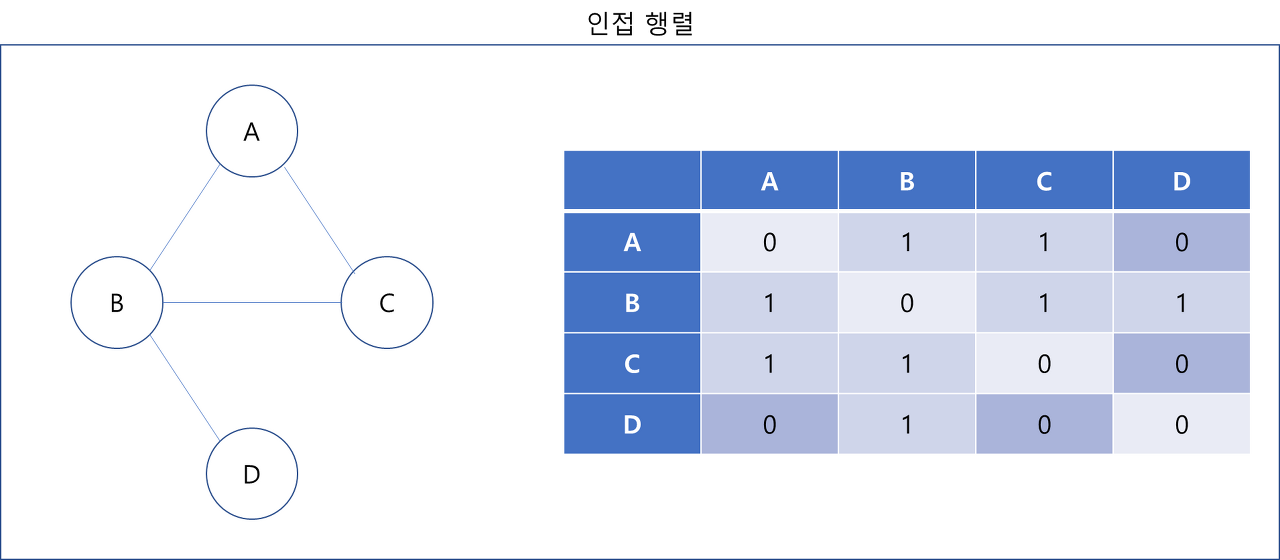

In [2]:
# 행(Row)이 3개인 2차원 리스트로 인접 리스트 표현 

graph = [[] for _ in range(3)]

# 노드 0에 연결된 노드 정보 저장(노드, 거리)

graph[0].append((1,7))
graph[0].append((2,5))

# 노드 1에 연결된 노드 정보 저장 (노드 ,거리)

graph[1].append((0,7))

# 노드 2에 연결된 노드 정보 저장 

graph[2].append((1,7))

print(graph)

[[(1, 7), (2, 5)], [(0, 7)], [(1, 7)]]


In [5]:
# 음료수 얼려먹기 

# N x M 크기의 얼음 틀이 있다. 구멍이 뚫려있는 부분은 0 칸막이가 있으면 1. 구멍이 뚫려있는 부분끼리 상,하,좌,우로 붙어 있는 경우 서로 연결되어 있는 것으로 간주한다.


# N x M 을 공백으로 입력받기 
N,M = map(int, input().split())

# 2차원 리스트의 맵 정보 입력 받기 

graph = []

for i in range(N):
    graph.append(list(map(int, input())))

# DFS로 특정한 노드를 방문한 뒤에 연결된 모든 노드들도 방문

def dfs(x, y):
    # 주어진 범위를 벗어나면 즉시 종료
    if x <= -1 or x >= N or y <= -1 or y >= M:
        return False
    # 현재 노드를 아직 방문하지 않았다면
    if graph[x][y] == 0:
        graph[x][y] = 1
        
    # 상하좌우의 위치도 모두 재귀적으로 호출
        dfs(x -1, y)
        dfs(x, y-1)
        dfs(x+1, y)
        dfs(x,y+1)
        return True
    return False

# 모든 노드(위치)에 대하여 음료수 채우기 

result = 0

for i in range(N):
    for k in range(M):
        # 현재 위치에서 DFS 수행
        if dfs(i,k) == True:
            result += 1

print(result)
    
    
    

3 3
001
010
101
3


In [11]:
# 미로 탈출 

from collections import deque

N,M = map(int, input().split())

graph = []

for i in range(N):
    graph.append(list(map(int, input())))
    
    
dx = [-1,1,0,0]
dy = [0,0,-1,1]

def bfs(x,y):
    queue = deque()
    queue.append((x,y))
    
    while queue:
        x, y = queue.popleft()
        # 현재 위치에서 네 방향으로의 위치 확인
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            
            if nx < 0 or ny < 0 or nx >= N or ny >= M:
                continue
            
            if graph[nx][ny] == 0:
                continue
                
            if graph[nx][ny] == 1:
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx, ny))
                
        return graph[N-1][M-1]
    
print(bfs(0,0))
    

3 3
111
111
101
1


In [6]:
# 백준 단지번호붙이기  xxx - bfs dfs 풀이 둘 다 가능.

from collections import deque
    
dx = [-1,1,0,0]
dy = [0,0,-1,1]

def bfs(graph,a,b):
    n = len(graph)
    queue = deque()
    queue.append((a,b))
    graph[a][b] = 0
    count = 1
    
    while queue:
        x,y = queue.popleft()
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            
            if nx < 0 or nx >= n or ny < 0 or ny >= n:
                continue
                
            if graph[nx][ny] == 1:
                graph[nx][ny] = 0
                queue.append((nx,ny))
                count += 1

                
    return count


n = int(input())
graph = []
for i in range(n):
    graph.append(list(map(int, input())))

cnt = []
for i in range(n):
    for j in range(n):
        if graph[i][j] == 1:
            cnt.append(bfs(graph, i, j))

cnt.sort()
print(len(cnt))
for i in range(len(cnt)):
    print(cnt[i])

4
1100
0000
1111
1101
2
2
7


In [7]:
from collections import deque

N,M = map(int, input().split())

graph = []

for _ in range(N):
    graph.append(list(map(int, input())))
    
def bfs(x,y):
    dx = [-1,1,0,0]
    dy = [0,0,-1,1]
    
    queue = deque()
    queue.append((x,y))
    
    while queue:
        x,y = queue.popleft()
        
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            
            if nx < 0 or nx >= N or ny < 0 or ny >= M:
                continue
                
            if graph[nx][ny] == 0:
                continue
            
            if graph[nx][ny] == 1:
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx,ny))
            
    return graph[N-1][M-1]


print(bfs(0,0))
    

    

4 6
101111
101010
101011
111011
15
